# **NLP Challenge: IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis**

### Load IMDB dataset from kaggle

In [8]:
# Load the data set
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Preprocess the Data

In [9]:
# 1 . Label Encoding  :
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


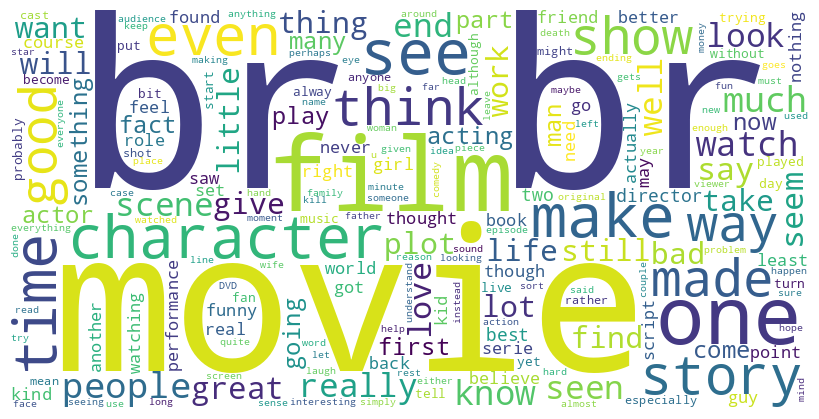

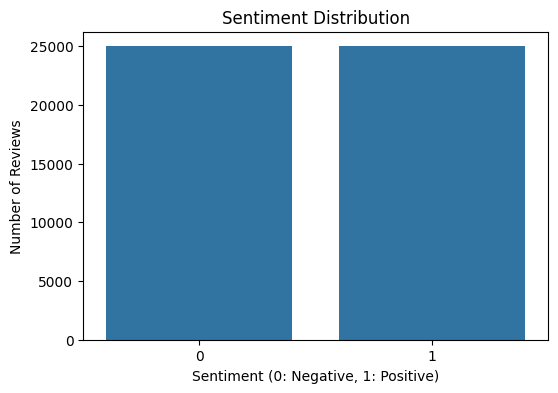

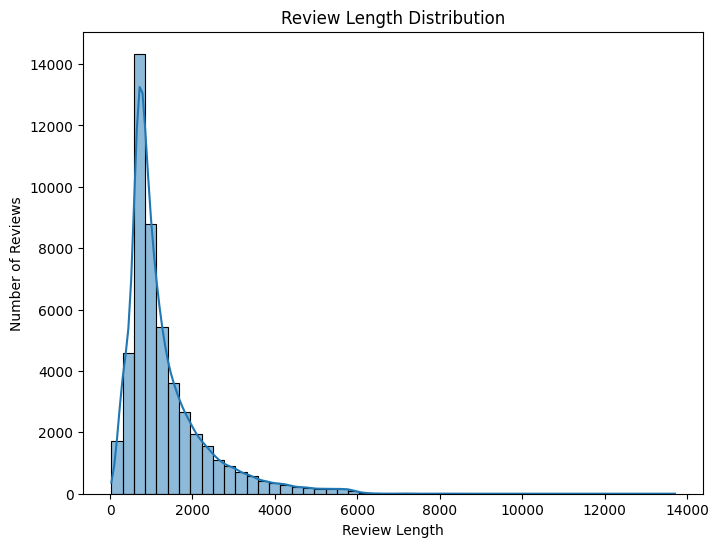

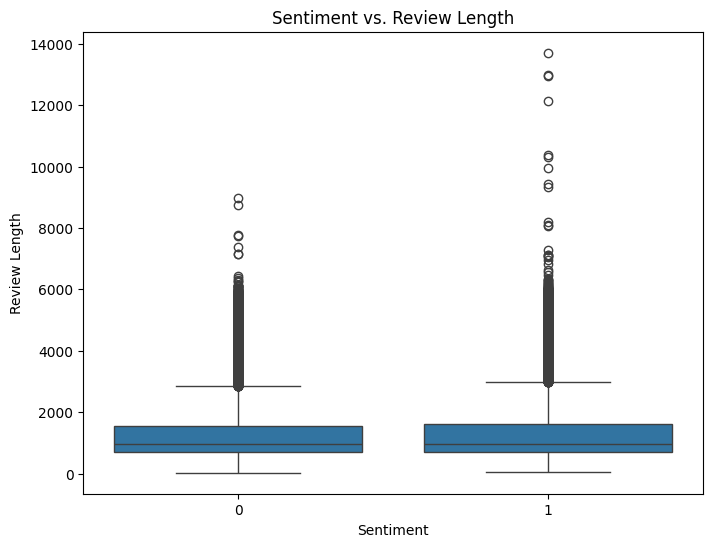

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Word Cloud (requires wordcloud library)
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

# Combine all reviews into a single string
text = " ".join(review for review in df['review'])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(text)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# 2. Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Number of Reviews')
plt.show()

# 3. Review Length Distribution
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

# 4.  Sentiment vs. Review Length (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Sentiment vs. Review Length')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

In [ ]:
# 2. Text Preprocessing :
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    text = ' '.join(words)
    return text

df['review'] = df['review'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [ ]:
# 3. Train_Test_Split :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

### Text Tokenization and Padding

In [ ]:
# Text Tokenization and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Save the tokenizer
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_len = 500
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

### Model Building

In [ ]:
# Build a model

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Training the model

In [ ]:
model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=64)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 440s 697ms/step - accuracy: 0.7642 - loss: 0.4725 - val_accuracy: 0.8930 - val_loss: 0.2612
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 435s 688ms/step - accuracy: 0.9242 - loss: 0.2059 - val_accuracy: 0.8834 - val_loss: 0.2868
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 436s 698ms/step - accuracy: 0.9447 - loss: 0.1523 - val_accuracy: 0.8881 - val_loss: 0.2894
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 437s 690ms/step - accuracy: 0.9615 - loss: 0.1097 - val_accuracy: 0.8806 - val_loss: 0.3429
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 427s 684ms/step - accuracy: 0.9549 - loss: 0.1263 - val_accuracy: 0.8750 - val_loss: 0.3749


In [ ]:
# After training the model (as shown earlier)
model.save('/content/drive/MyDrive/sentiment_analysis_model.keras')

### Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.8768 - loss: 0.3714
Test Accuracy: 87.50%


### Test It and Making Predictions

In [ ]:
new_review = "I saw this movie when I was about 12 when it came out. I recall the scariest scene was the big bird eating men dangling helplessly from parachutes right out of the air. The horror. The horror.<br /><br />As a young kid going to these cheesy B films on Saturday afternoons, I still was tired of the formula for these monster type movies that usually included the hero, a beautiful woman who might be the daughter of a professor and a happy resolution when the monster died in the end. I didn't care much for the romantic angle as a 12 year old and the predictable plots. I love them now for the unintentional humor.<br /><br />But, about a year or so later, I saw Psycho when it came out and I loved that the star, Janet Leigh, was bumped off early in the film. I sat up and took notice at that point. Since screenwriters are making up the story, make it up to be as scary as possible and not from a well-worn formula. There are no rules."
new_review_cleaned = clean_text(new_review)
new_review_seq = tokenizer.texts_to_sequences([new_review_cleaned])
new_review_pad = pad_sequences(new_review_seq, maxlen=max_len)

prediction = model.predict(new_review_pad)
print(f'Predicted sentiment: {"positive" if prediction > 0.5 else "negative"}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Predicted sentiment: negative
